# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
#install.packages("mclust")
#install.packages("cluster")
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
datos1 <-read.table("..//data//semillas.txt",dec=".")

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

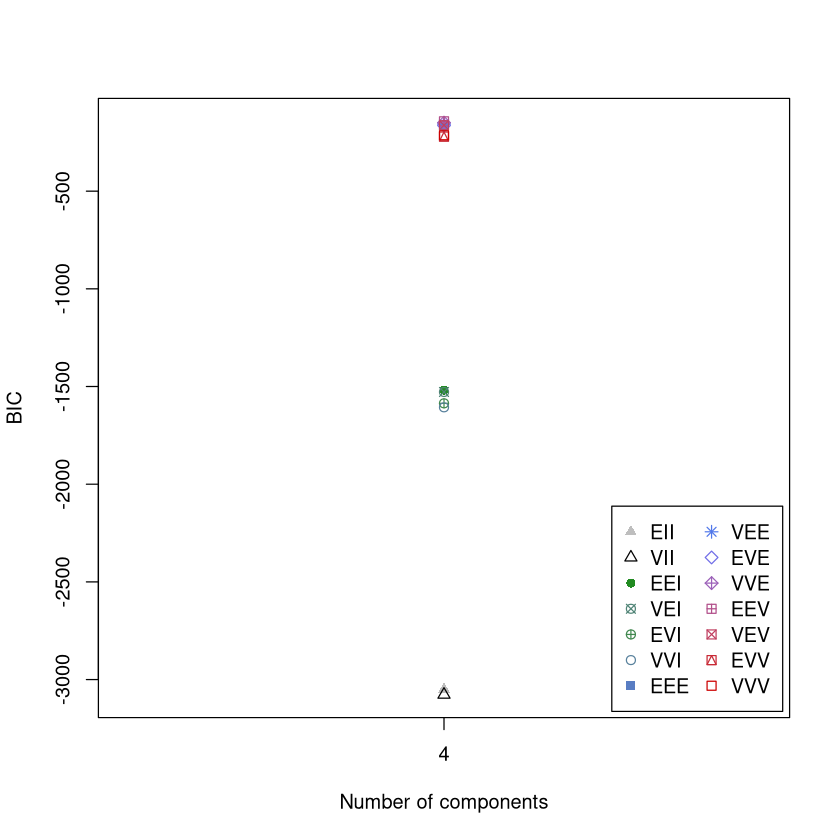

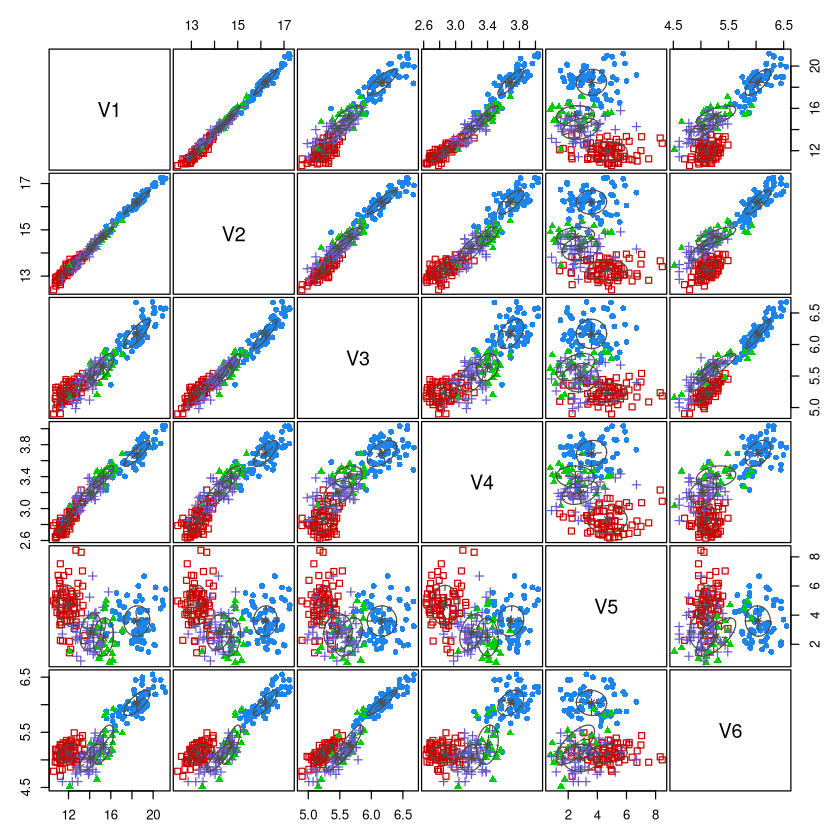

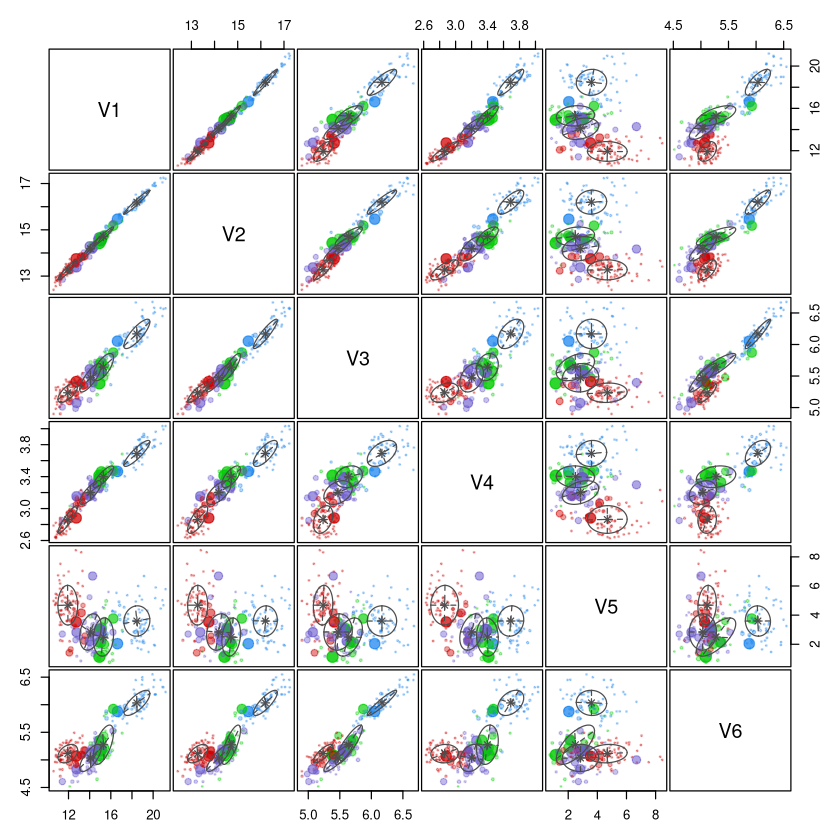

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

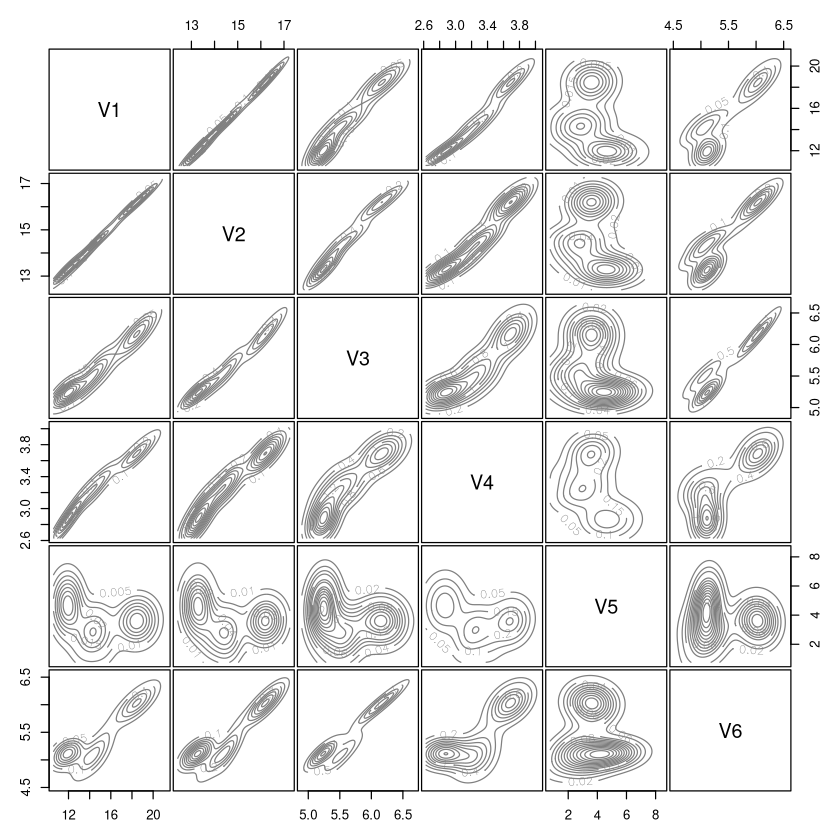

In [2]:
clus <-Mclust(datos, G=4)
summary(clus)
plot(clus)
clus

In [3]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

V1,V2,V3,V4,V5,V6
18.46213,16.19470,6.167813,3.690301,3.596481,6.033091
11.93175,13.27016,5.234781,2.863010,4.682985,5.113286
15.29414,14.71759,5.641832,3.398164,2.495003,5.274619
14.07522,14.18237,5.472207,3.200684,2.842341,5.035122


1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   2   4   4   3   4   1   4   2   3   1   1   1   2   2   3   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   4   2   2   3   2   4   4   1   4   4   2   3   1   1   1   2   4   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   2   2   1   1   2   2   2   1   4   1   2   4   4   1   3   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   1   4   4   1   4   1   3   1   2   1   3   1   1   4   1   4   1   4   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   3   3   4   1   2   4   2   2   2   2   2   4   2   3   2   1   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   1   2   3   4   4   3   4   3   1   4   2   2   2   3   4   3   2   4 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   1   2   2   1   1   4   4   3   3   4   2   2   1   1   1   2   3   1   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   2   1   2   2   1   2   2   1   1   2   4   2   2   2   2   1   4   2   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   4   3   4   2   4   2   2   4   2   2   4   1   1   1   4   1   4 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  2   1   2   4   4   1   1   1   1   2   2   2   2   1   1   2   2   2   4   1 
201 202 203 204 205 206 207 208 209 210 
  1   2   3   2   4   2   1   1   2   1

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

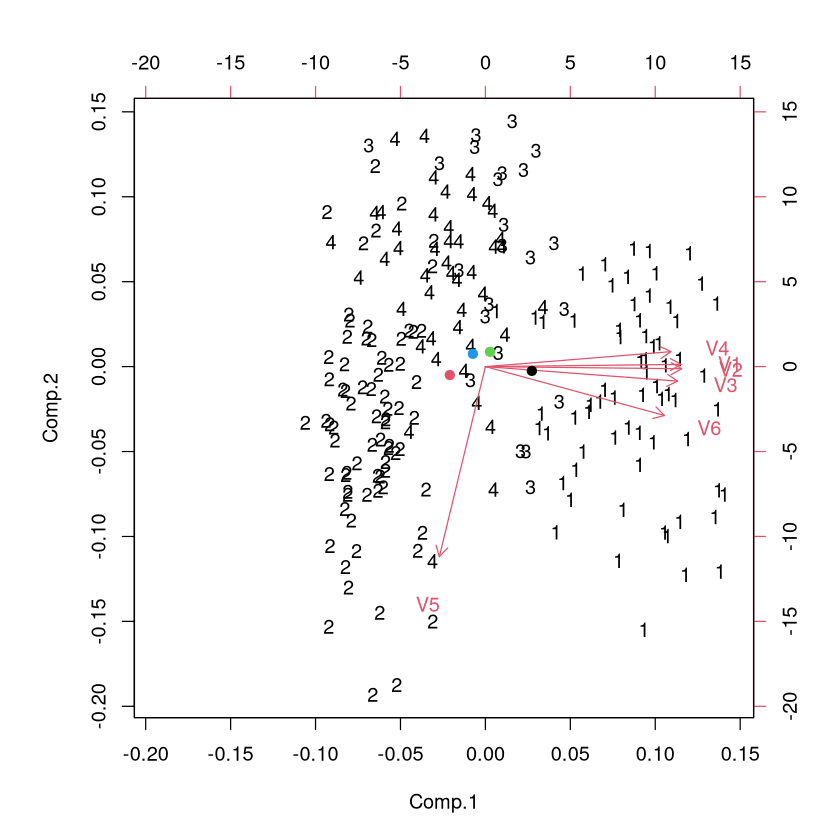

In [4]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


<hr>
<h3 style="color:orange">Desarrollo ejercicio 1.a </h3>

Agrupamiento basado en modelos basado en modelos de mezcla gaussiana finitos parametrizados. Los modelos se estiman mediante un algoritmo EM inicializado mediante un agrupamiento aglomerativo basado en un modelo jerárquico. A continuación, se selecciona el modelo óptimo de acuerdo con BIC.

Entrada:
<ol>
<li>Data: Conjunto de datos que se utilizara para realizar la clasificacion y agrupacion. Deben ser una matriz.</li>
<li>G: Un vector de enteros que especifica el numero maximo de clusters que se deben considerar. Por defecto = 1:9.</li>
<li>modelNames: Un vector de strings que indica el modelo que se ajustaran en la fase EM de agrupamiento. Por defecto:
    <ul>
        <li>Para datos univariados (d = 1): c("E", "V")</li>
        <li>Para datos multivariados (n > d): todos los modelos disponibles </li>
        <li>Para datos multivariados (n <= d): los modelos esfericos y diagonales p.e: c("EII", "VII", "EEI", "EVI", "VEI", "VVI")</li>
    </ul>
</li>
<li>prior: El valor predeterminado no asume ningún valor previo, pero este argumento permite la especificación de un valor previo conjugado en las medias y las varianzas a través de la función 'priorControl'.</li>
<li>initialization: </li>
<li>warn: Un valor lógico que indica si se deben emitir o no ciertas advertencias (generalmente relacionadas con la singularidad).</li>
<li>control: Una lista de parámetros de control para EM. Los valores predeterminados se establecen mediante la llamada emControl()</li>
<li>x: Un objeto de clase 'mclustBIC'. Si se entregan, los valores BIC de los modelos que ya se calcularon y están disponibles en x no se vuelven a calcular. Todos los argumentos, con la excepción de data, G y modelName, se ignoran y sus valores se establecen como se especifica en los atributos de x. </li>
</ol>
Salida: La salida es un objeto de clase 'Mclust', sus elementos son:
<ol>
<li>Data: Matriz de datos de entrada</li>
<li>modelName: Una cadena de caracteres que indica el modelo en el que se produce el BIC óptimo.</li>
<li>n: Numero de observaciones en la Data </li>
<li>d: Dimension de la matriz Data</li>
<li>G: El número óptimo de componentes de la mezcla</li>
<li>BIC: Todos los valores de BIC </li>
<li>loglik: El log-verosimilitud correspondiente al BIC óptimo.</li>
<li>df: El numero estimado de parametros</li>
<li>bic: Valor BIC del modelo seleccionado</li>
<li>icl: Valor ICL del modelo sleccionado</li>
<li>hypvol: 
El parámetro de hipervolumen para el componente de ruido si es necesario; de lo contrario, establecer en NULL</li>
<li>parameters: Una lista [pro, mean, variance]
    <ul>
        <li>pro: Un vector cuyo componente k-ésimo es la proporción de mezcla para el componente k-ésimo del modelo de mezcla. Si faltan, se asumen proporciones iguales.</li>
        <li>mean: La media de cada componente. Si hay más de un componente, se trata de una matriz cuya k-ésima columna es la media de la k-ésima componente del modelo mixto.</li>
        <li>variance: Una lista de parámetros de varianza para el modelo. Los componentes de esta lista dependen de la especificación del modelo.</li>
    </ul>
</li>
<li>z: Una matriz cuya [i,k]ésima entrada es la probabilidad de que la observación i en los datos de prueba pertenezca a la clase k.</li>
<li>classification: La clasificación correspondiente a z, p.e: map(z).</li>
<li>uncertainty: La incertidumbre asociada a la clasificación. </li>
</ol>

Referencia: <a href= https://www.rdocumentation.org/packages/mclust/versions/5.4.6/topics/Mclust> Mclust - RDocumentation</a>

<h3 style="color:orange">Desarrollo ejercicio 1.b </h3>

Modelo EEV (elipsoidal, igual volumen e igual forma), G = 4, el grupo 1 se caracteriza por valores altos de V1, V2, V3, V4 y V6 menos de V5, el grupo 2 por valores medios de V1, V2, V3, V4, V6 y bajos de V5, el grupo 3 y 4 con una menor cantidad de valores.

Referencia: <a href= https://rdrr.io/cran/mclust/man/mclustModelNames.html> Modelo: EVV</a>
<hr>

**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

<hr>
<h3 style="color:orange">Desarrollo ejercicio 2.a </h3>


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 2 components: 

 log-likelihood   n df      BIC       ICL
       80.12963 210 49 -101.749 -104.2238

Clustering table:
  1   2 
 71 139 

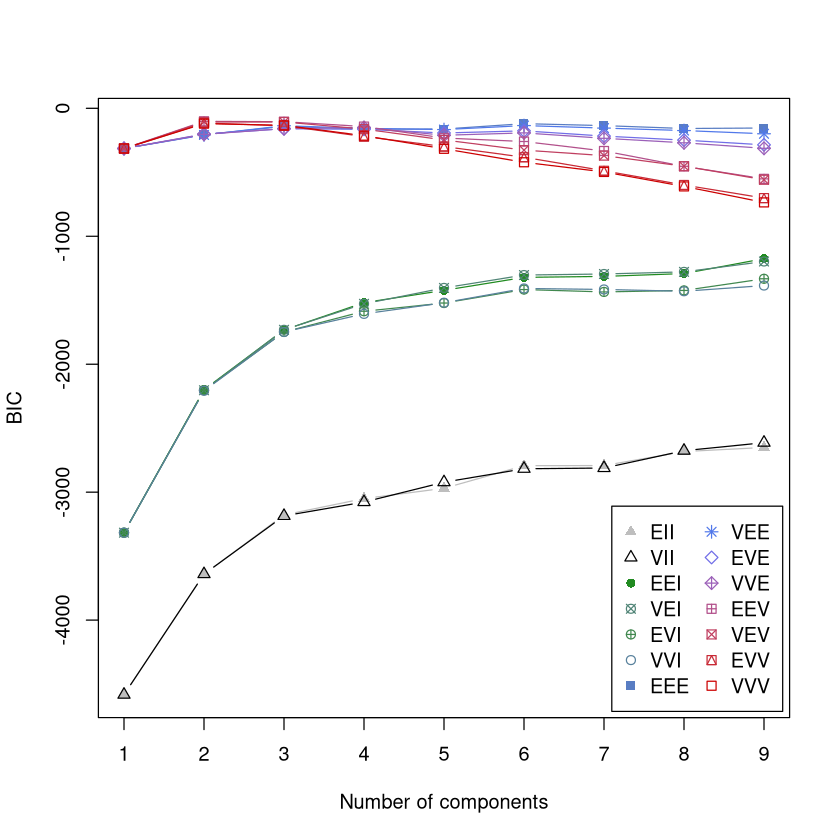

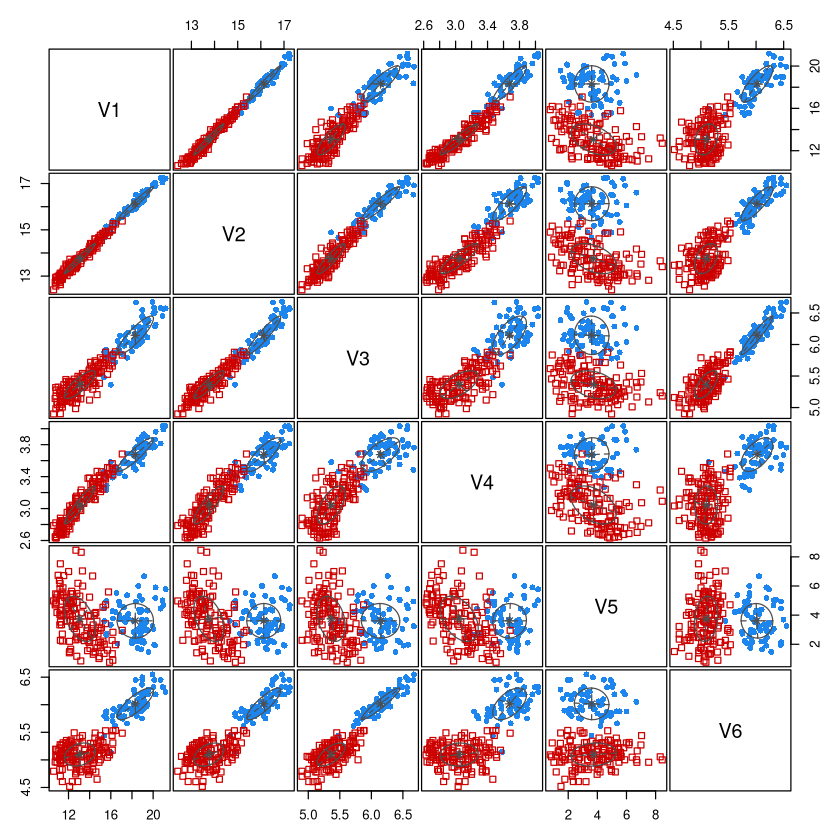

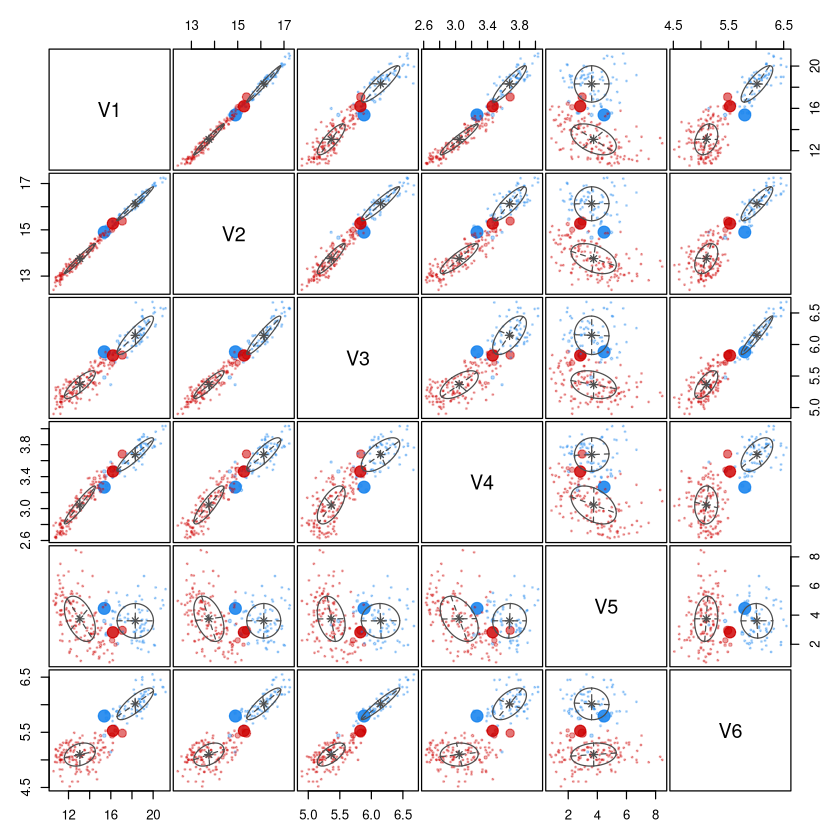

'Mclust' model object: (EEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

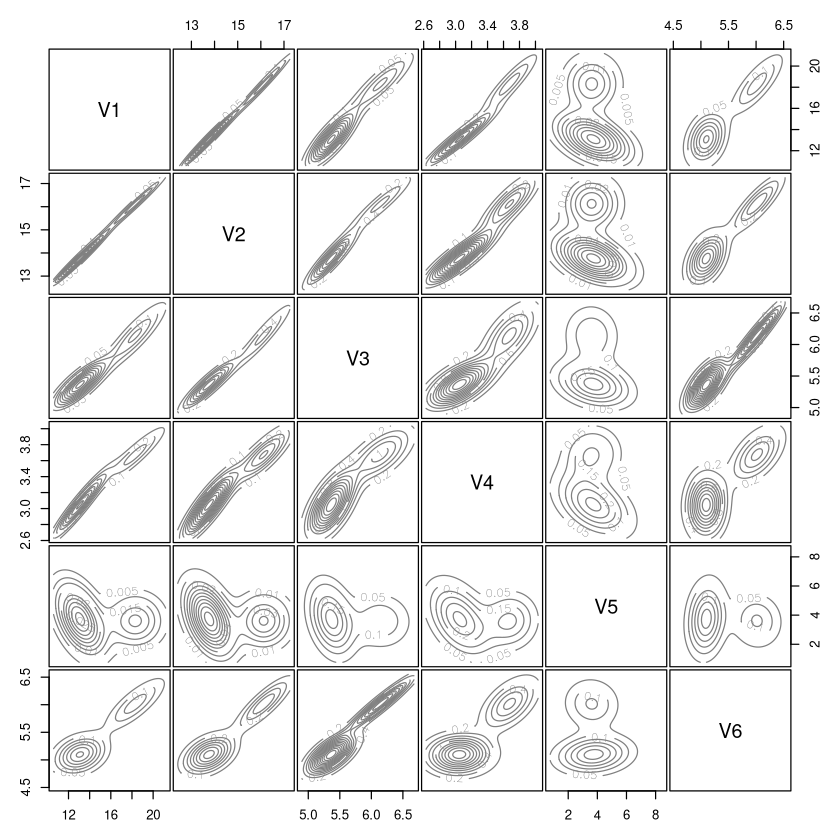

In [5]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus

Con la informacion que entrega el primer grafico (BIC) podemos interpretar que con G = 2 tenemos un maximo local. El siguiente maximo local se encuentra con G = 6,
seria apropiado utilizar G = 3, asi se logra una mayor distinción entre los grupos y son más representativos. 

<h3 style="color:orange">Desarrollo ejercicio 2.b </h3>

Al igual que en k-means, K=G=3. Elegimos G = 3, para que los grupos representen los datos de mejor manera, se pueden observar similutudes en los graficos obtenidos por k-means y Mclust, sin embargo los grupos de k-means estan mejor consitutidos o definidos ya que asigna cada punto de datos a un único cluster en función de su cercanía a un centroide, en cambio Mclust asigna probabilidades a cada punto de datos de pertenecer a cada cluster.
<hr>

**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

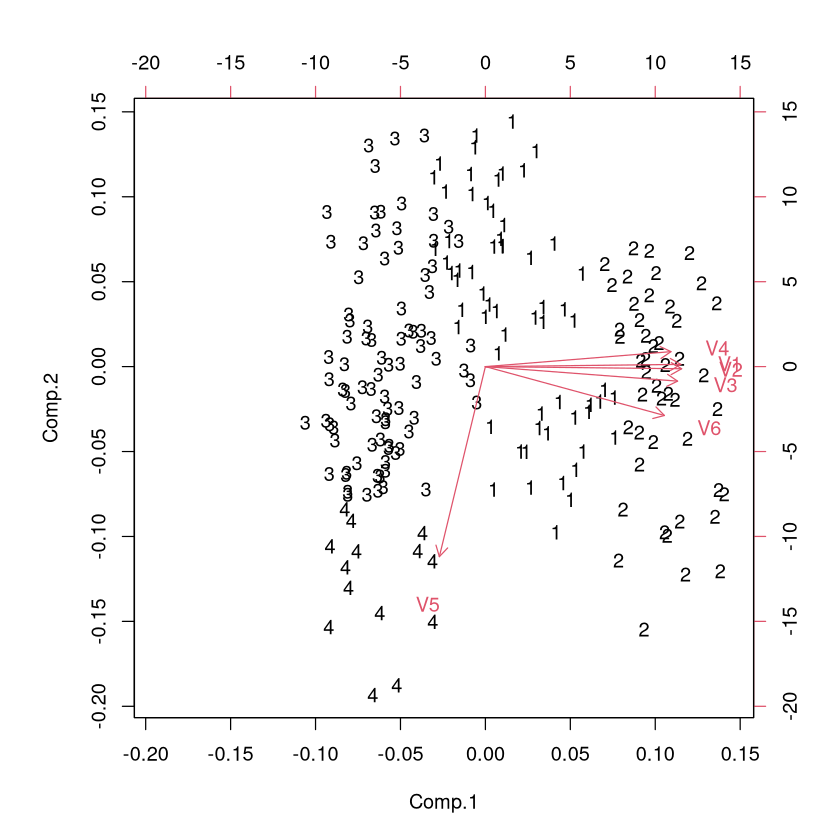

In [15]:
res3 <- hclust(dist(datos))
biplot(res, xlabs = cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

<hr>
<h3 style="color:orange">Desarrollo ejercicio 3.a </h3>
Función utilizada para realizar un agrupamiento jerárquico de datos. Este método se basa en la idea de que los objetos similares se agrupan más cerca entre sí que aquellos que son menos similares.

Entrada:</br>
1. d: matriz de distancias o similitudes.</br>
2. method: método de agrupamiento a utilizar. Puede ser "ward.D", "single", "complete", "average", "mcquitty", "median" o "centroid"</br>
3. members: una matriz opcional que especifica el número de miembros en cada grupo.</br>
4. x: un objeto del tipo producido por hclust. </br>
5. hang: La fracción de la altura de la parcela por la cual las etiquetas deben colgar por debajo del resto de la parcela. Un valor negativo hará que las etiquetas cuelguen desde 0.</br>
6. check: valor lógico que indica si el objeto x debe checkearse para su validez, valor por defecto: check=TRUE</br>
7. labels: Un vector de caracteres de etiquetas para las hojas del árbol.</br>

Salida: Un objeto de clase hclust que describe el árbol producido por el proceso de agrupación.</br>
1. merge: una matriz que especifica los grupos que se fusionaron en cada paso del agrupamiento jerárquico.</br>
2. height: el valor del criterio asociado con el metodo de agrupamiento</br>
3. order: un vector que especifica el orden en el que se presentan los objetos en el árbol de agrupamiento. </br>
4. labels: un vector que contiene las etiquetas de los objetos.</br>
5. method: el método de agrupamiento utilizado.
6. call: la llamada a la función "hclust" con los parámetros utilizados. </br>
7. dist.method: la distancia que se ha utilizado para crear d <br>

Referencia: <a href = https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust>hclust - RDocumentation</a>

<h3 style="color:orange">Desarrollo ejercicio 3.b</h3>

El agrupamiento con 4 grupos, indica que V1,V2,V3,V4,V6 tienen valores muy positivos en el grupo 2, tienen valores promedio en el grupo 1, en cambio V5 tiene valores muy bajos en el grupo 4, y casi nulos en el grupo 2.

<h3 style="color:orange">Desarrollo ejercicio 3.C </h3>

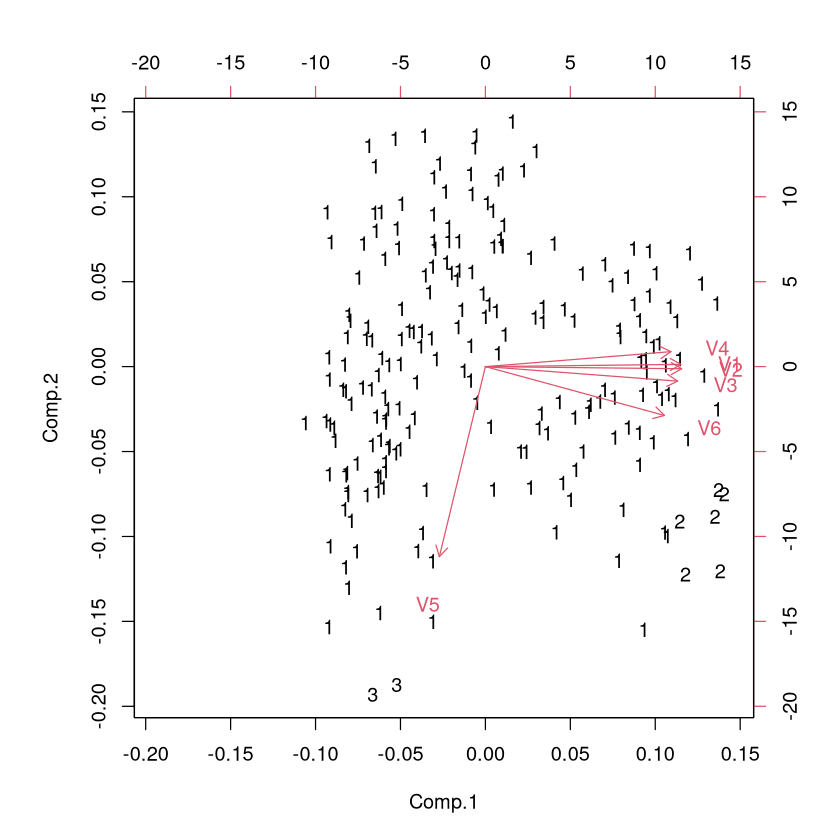

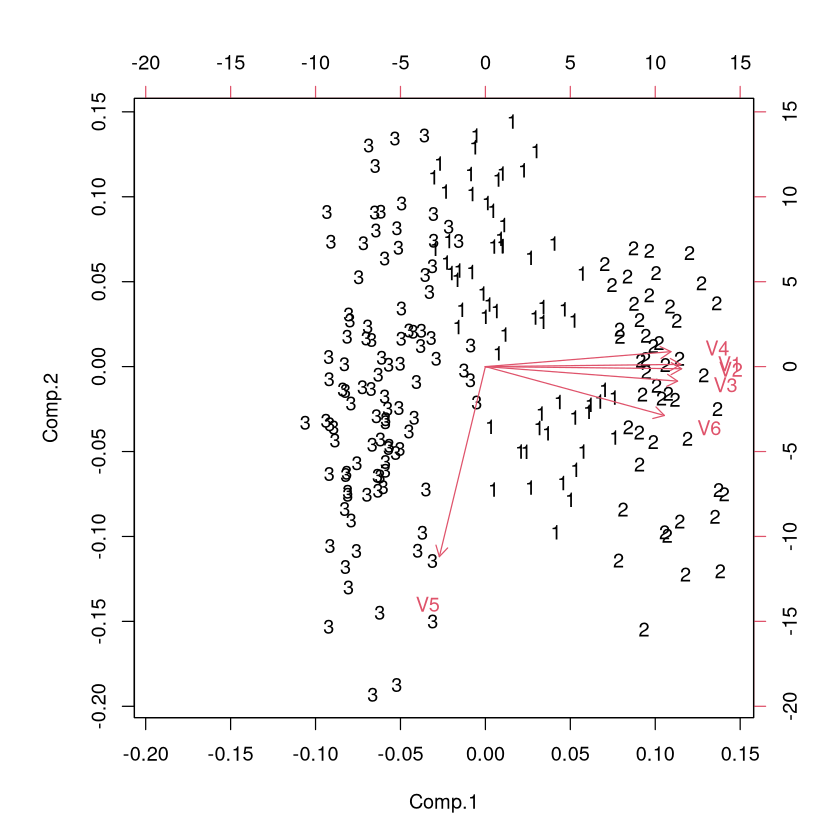

In [13]:
# dist.method por defecto es euclidean
# Analisis de componentes principales
# porcentaje de variablidad 
# entendimiento de los graficos
data <- dist(datos, method = "euclidean") #"euclidean", "maximum", "manhattan", "canberra", "binary", "minkowski"

res4 <- hclust(
    data,
    method = "single", # "single", "ward.D", "complete", "average", "ward.D", "ward.D2", "centroid", "mcquitty"
    )
res5 <- hclust(
    data,
    method = "complete",
    #labels = c("karma","rosa","canadian")
    )
G <- 3 # Numero de grupos
biplot(res, xlabs = cutree(res4,G))
biplot(res, xlabs = cutree(res5,G))

**Ejercicio 4:** (3 puntos)

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian

b) Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico, con las variables de caracterización de las semillas (V1 a V6)  y considerando K=3 como número de grupos.

c) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos en (b), considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

<h3 style="color:orange">Desarrollo ejercicio 4.a </h3>


Purity: Cuantifica la homogeneidad del cluster con respecto a las etiquetas de clase. Mide la proporción de puntos de datos en un grupo que pertenecen a la clase mayoritaria de ese grupo. Valores de pureza más altos indican que los grupos son más consistentes internamente en términos de membresía de clase.<br>

Rand index: Medida utilizada para evaluar la similitud entre dos agrupamientos, se basa en la comparación de pares de puntos de datos. Toma 4 posibles agrupaciones:
<ul>
    <li>TP (true positives): Pares en un mismo grupo en ambos agrupamientos.</li>
    <li>TN (true negatives): Pares en diferentes grupos en ambos agrupamientos.</li>
    <li>FN (false negatives): Pares que estan en diferente grupo en un agrupamiento y en el mismo grupo en el otro agrupamiento</li>
    <li>FP (false positives): Pares que estan en el mismo en uno de los agrupamientos y en diferente grupo en el otro agrupamiento. </li>
</ul>
Rand index siempre toma valores entre 0 y 1, 
donde:
<ul>
    <li>0: Indica que los dos metodos de agrupamiento no estan de acuerdo en ningun grupo. TN = TP = 0 (Evento raro)</li>
    <li>1: Indica que dos métodos de agrupamiento concuerdan perfectamente en el agrupamiento de cada par de elementos.</li>
</ul>     

Mutual information: <br>

Referencia: <a href = "https://stats.stackexchange.com/questions/95731/how-to-calculate-purity#:~:text=Within%20the%20context%20of%20cluster,%5B0..1%5D.">Purity</a><br>
Referencia: <a href = "https://www.statology.org/rand-index/">Rand index</a><br>

In [8]:
datos1 <-read.table("..//data//semillas.txt",dec=".")

clus <-Mclust(datos, G=3)
cl <- clus$classification
tab <- table(datos1$V7, cl)
tab

   cl
     1  2  3
  1  0 13 57
  2 68  0  2
  3  0 70  0